## Libreria y carga de datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("..\\data\\processed\\feature_engeering.csv", index_col=0, parse_dates=["date"])

## Transformación

Vamos a utilizar ``LabelEncoder`` para transformar las features *repo_name* y *description*. Ambas variables categóricas constan de demasiados únicos para realizar un ``OneHotEncoder`` o un mapeo. 

In [3]:
df_1 = df.copy()

le = LabelEncoder()

for x in df_1[["repo_name", "description"]].columns:
    df_1[x] = le.fit_transform(df_1[x])

df_1.head()

,date,rank,repo_name,stars,forks,username,issues,description,days_since_lc,repos_by_user
0,2018-12-18,1,1244,58777,11448,3209,439,412,5.0,1.0
1,2018-12-19,1,1244,58801,11454,3209,439,412,6.0,1.0
2,2018-12-20,1,1244,58840,11455,3209,439,412,0.0,1.0
3,2018-12-21,1,1244,58882,11465,3209,440,412,1.0,1.0
4,2018-12-22,1,1244,58936,11470,3209,439,412,2.0,1.0


Con las columnas ya transformadas, vamos a realizar un pequeño análisis exploratorio de las mismas

array([[<Axes: title={'center': 'repo_name'}>,
        <Axes: title={'center': 'description'}>]], dtype=object)

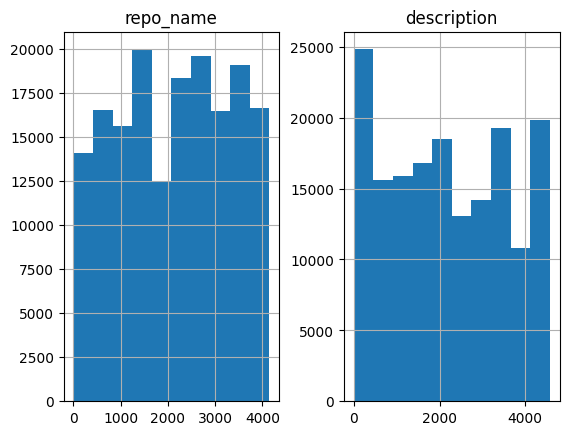

In [4]:
df_1[["repo_name", "description"]].hist()

<Axes: >

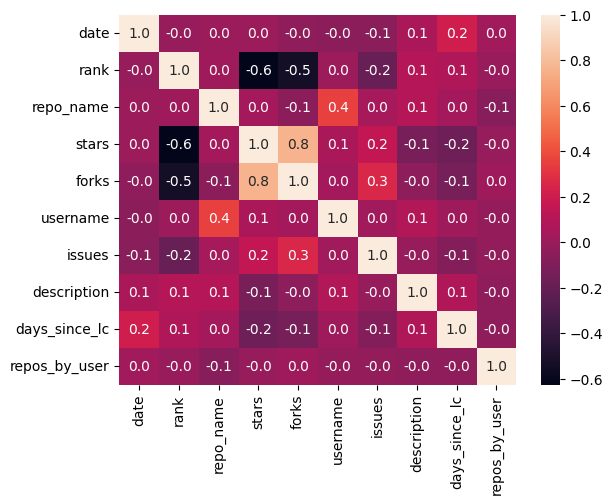

In [5]:
sns.heatmap(df_1.corr(), annot=True, fmt=".1f")

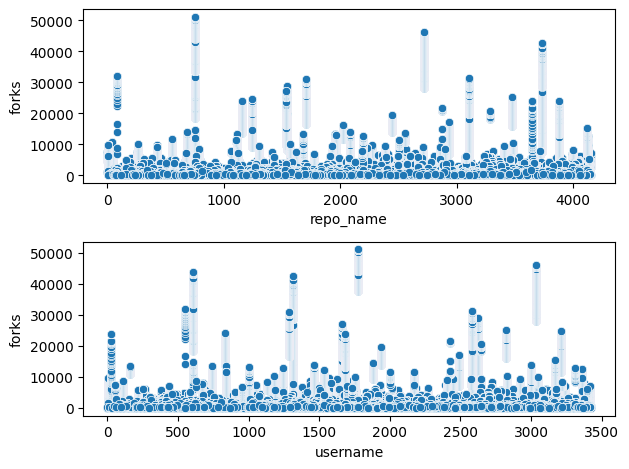

In [6]:
plt.subplots(2,1)

plt.subplot(2,1,1)
sns.scatterplot(df_1, x="repo_name", y="forks")

plt.subplot(2,1,2)
sns.scatterplot(df_1, x="username", y = "forks")

plt.tight_layout()

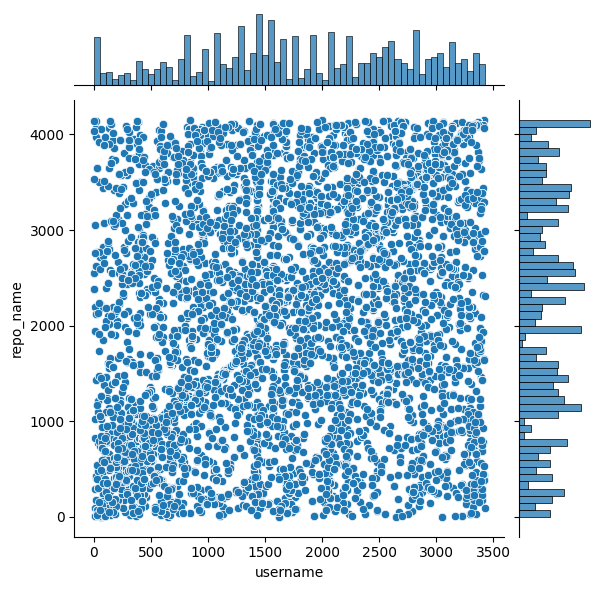

In [7]:
sns.jointplot(df_1, x="username", y="repo_name")

## Escalado

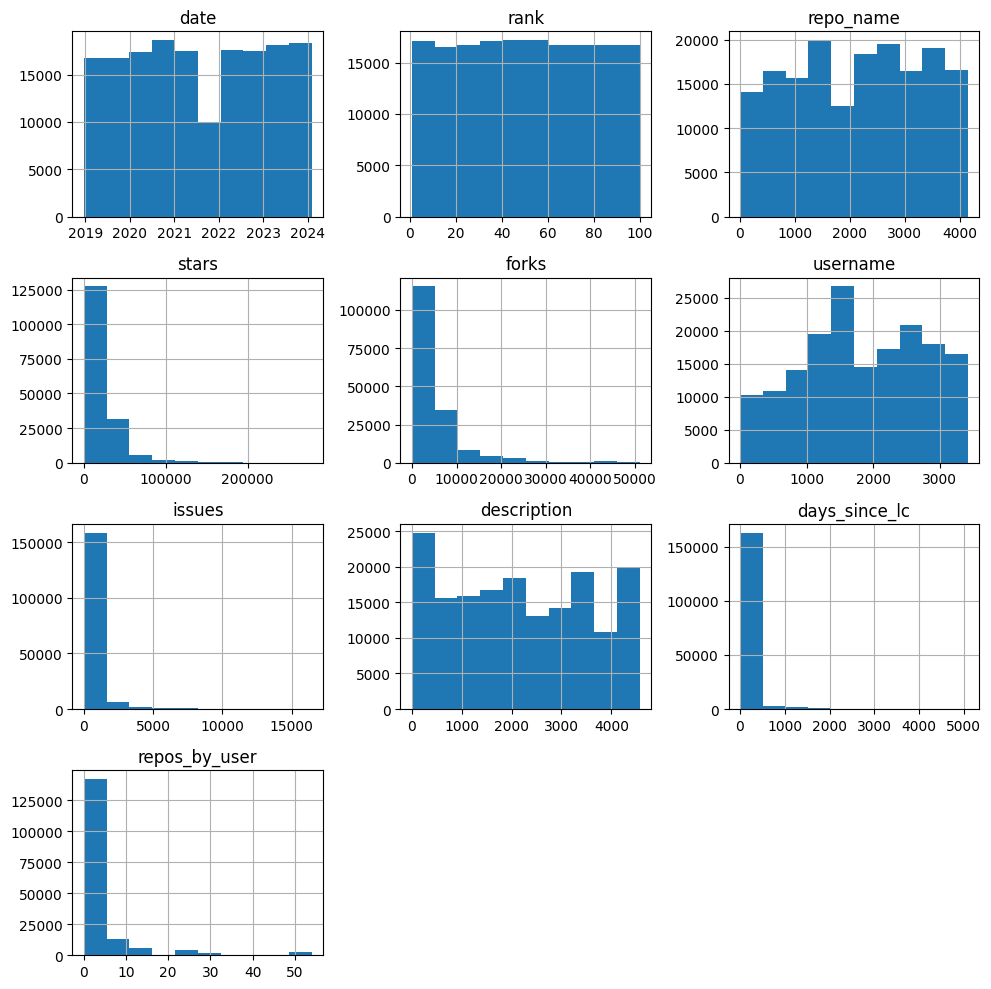

In [8]:
df_1.hist(figsize=(10,10))
plt.tight_layout()

Debido a las características de los features (no se ajustan a la normal, son variables discretas y hay outliers), el escalado será realizado mediante el método ``RobustScaler``.

In [18]:
df_1.to_csv("..\\data\\processed\\transformed.csv")

In [9]:
df_2 = df_1.copy()

df_2["day"] = df_2["date"].dt.day
df_2["month"] = df_2["date"].dt.month
df_2["year"] = df_2["date"].dt.year

df_2.drop(columns="date", inplace=True)

df_2.head()

,rank,repo_name,stars,forks,username,issues,description,days_since_lc,repos_by_user,day,month,year
0,1,1244,58777,11448,3209,439,412,5.0,1.0,18,12,2018
1,1,1244,58801,11454,3209,439,412,6.0,1.0,19,12,2018
2,1,1244,58840,11455,3209,439,412,0.0,1.0,20,12,2018
3,1,1244,58882,11465,3209,440,412,1.0,1.0,21,12,2018
4,1,1244,58936,11470,3209,439,412,2.0,1.0,22,12,2018


In [10]:
RobEsc = RobustScaler()
esc_features = RobEsc.fit_transform(df_2)
esc_features

array([[-1.        , -0.47926712,  2.78740589, ...,  0.13333333,
         1.        , -1.5       ],
       [-1.        , -0.47926712,  2.7890486 , ...,  0.2       ,
         1.        , -1.5       ],
       [-1.        , -0.47926712,  2.791718  , ...,  0.26666667,
         1.        , -1.5       ],
       ...,
       [-0.24489796, -0.02362584,  2.10451745, ..., -1.        ,
        -0.66666667,  1.5       ],
       [-0.24489796, -0.02362584,  2.10602327, ..., -0.93333333,
        -0.66666667,  1.5       ],
       [-0.3877551 , -0.02362584,  2.10684463, ..., -0.86666667,
        -0.66666667,  1.5       ]])

In [11]:
df_2[['rank', 'repo_name', 'stars', 'forks', 'username', 'issues',
       'description', 'days_since_lc', 'repos_by_user', 'day', 'month',
       'year']] = esc_features

In [12]:
df_2

,rank,repo_name,stars,forks,username,issues,description,days_since_lc,repos_by_user,day,month,year
0,-1.000000,-0.479267,2.787406,1.826290,0.987031,0.883721,-0.718153,0.111111,0.0,0.133333,1.000000,-1.5
1,-1.000000,-0.479267,2.789049,1.827625,0.987031,0.883721,-0.718153,0.166667,0.0,0.200000,1.000000,-1.5
2,-1.000000,-0.479267,2.791718,1.827847,0.987031,0.883721,-0.718153,-0.166667,0.0,0.266667,1.000000,-1.5
3,-1.000000,-0.479267,2.794593,1.830071,0.987031,0.886628,-0.718153,-0.111111,0.0,0.333333,1.000000,-1.5
4,-1.000000,-0.479267,2.798289,1.831183,0.987031,0.883721,-0.718153,-0.055556,0.0,0.400000,1.000000,-1.5
...,...,...,...,...,...,...,...,...,...,...,...,...
168682,-0.346939,-0.023626,2.102943,1.042260,-0.124232,-0.334302,0.410430,-0.055556,0.0,0.933333,-0.833333,1.5
168683,-0.306122,-0.023626,2.103628,1.043817,-0.124232,-0.334302,0.410430,-0.111111,0.0,1.000000,-0.833333,1.5
168684,-0.244898,-0.023626,2.104517,1.043594,-0.124232,-0.331395,0.410430,-0.111111,0.0,-1.000000,-0.666667,1.5
168685,-0.244898,-0.023626,2.106023,1.044039,-0.124232,-0.331395,0.410430,-0.111111,0.0,-0.933333,-0.666667,1.5


Una vez escaladas las features, procedemos a guardar el DataFrame

In [13]:
df_2.to_csv("..\\data\\processed\\transformed_and_escaled.csv")

## Train y test

Con las features ya transformadas y escaladas, procedemos a separar en train y test.

In [14]:
train, test = train_test_split(df_2, test_size=0.2, random_state=42)

In [15]:
train

,rank,repo_name,stars,forks,username,issues,description,days_since_lc,repos_by_user,day,month,year
22801,-0.714286,0.908872,1.881656,1.291148,0.791809,-0.392442,-0.852707,-0.166667,0.0,0.666667,0.500000,0.5
76275,-0.428571,-0.452748,0.632170,0.996886,-0.131058,1.863372,0.455414,0.888889,5.0,0.000000,-0.500000,0.0
110981,0.530612,-0.816297,-0.697467,0.392126,-1.019795,-0.386628,-0.808917,20.222222,1.0,-0.333333,0.666667,1.0
7725,-0.918367,-0.105111,2.864203,2.650801,0.496246,-0.392442,0.494427,0.000000,2.5,0.200000,0.166667,0.5
123744,0.510204,-0.435873,-0.179055,-0.525356,0.556314,0.436047,0.533838,-0.111111,1.0,-0.600000,-0.333333,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.918367,0.789296,3.410472,2.781584,-0.053242,0.805233,0.930334,-0.166667,5.5,-0.733333,0.333333,0.5
103694,-0.734694,-0.323529,1.665640,1.270240,-0.395904,-0.392442,0.796178,0.222222,0.5,0.133333,-0.333333,1.0
131932,-0.020408,0.623433,0.179740,-0.249333,0.756997,-0.154070,0.909236,0.388889,0.0,0.266667,-0.666667,0.0
146867,0.428571,0.847637,0.018617,0.888568,0.994539,-0.372093,0.828424,-0.166667,0.0,-1.000000,-0.166667,0.5


In [16]:
test

,rank,repo_name,stars,forks,username,issues,description,days_since_lc,repos_by_user,day,month,year
78750,0.938776,0.677917,-0.619918,-0.572509,-0.629352,-0.328488,0.655255,21.722222,0.0,0.000000,-0.500000,-1.0
70944,0.632653,-0.822083,-0.318412,-0.168594,-0.247782,-0.348837,0.005971,0.166667,1.5,0.533333,0.666667,-1.0
38863,-0.102041,0.373192,0.076112,-0.399244,0.579522,0.654070,-0.876990,-0.166667,2.5,0.266667,1.000000,-1.0
72912,0.040816,-0.541948,-0.028405,0.805827,-0.630717,1.412791,-0.513137,-0.166667,2.5,-0.933333,0.333333,-0.5
29276,-0.428571,0.615718,0.253114,-0.162144,-0.147440,2.296512,0.367436,-0.166667,1.0,-0.200000,0.333333,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
137502,0.632653,-0.486500,-0.192882,-0.199733,-0.665529,-0.020349,-0.481290,-0.111111,0.5,-0.266667,0.833333,0.5
144424,0.183673,-0.942623,0.218754,-0.153470,-0.563140,-0.392442,0.303344,2.611111,0.0,1.000000,-0.833333,0.5
129274,0.408163,-0.699132,-0.162081,-0.082073,-1.125597,-0.029070,-0.413615,0.444444,0.0,0.466667,-0.500000,-0.5
127472,0.591837,-0.998071,0.003696,-0.157918,-0.922867,-0.311047,0.487659,-0.111111,0.5,0.666667,0.333333,0.0


Teniendo ya separados nuestros datos en set de entrenamiento y set de prueba, se guardan en un csv.

In [17]:
train.to_csv("..\\data\\processed\\train.csv")
test.to_csv("..\\data\\processed\\test.csv")